In [1]:
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
## Let's import the vizaulization libraries.
import matplotlib.pyplot as plt
import seaborn as sns ## Seaborn is based on matplotlib and offers more control
## This is written so that we can see our results within the jupyter notebook
%matplotlib inline

In [2]:
## customizing rcParams
rcparam_dict={"figure.figsize":"16,10","axes.labelsize":50,"axes.titlesize":"large","font.family":"Comic Sans MS","text.color":"#A53010","axes.labelcolor":"A53010",
              "axes.labelsize":"medium",'xtick.color':'#A53010', 'ytick.color':'#A53010'}

In [3]:
context= "poster"
style= "darkgrid"
font_family = "Comic Sans MS"

In [4]:
sns.set(context=context,style=style,font=font_family,rc=rcparam_dict) ## Setiing context, style and rcparams in a single line

In [5]:
auto_data= pd.read_csv("auto.csv")

- check head of the dataset
- check info method
- check describe method

In [6]:
auto_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [7]:
auto_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null object
weight          398 non-null int64
acceleration    398 non-null float64
model year      398 non-null int64
origin          398 non-null int64
car name        398 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [8]:
auto_data.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [9]:
auto_data.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [10]:
auto_data.horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

remove all the rows which has missing values for horsepower

In [11]:
auto_data = auto_data[auto_data.horsepower != '?']

In [12]:
auto_data.horsepower = auto_data.horsepower.astype('float')
auto_data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [13]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [14]:
features=['horsepower']
max_degree=10
mse_test_list=[]
mse_train_list=[]

In [15]:
X = auto_data[features]
y = auto_data['mpg']

Let's split or dataset into training and testing set

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,random_state=200)

Let's fit the polynomial regression of different orders to our training data

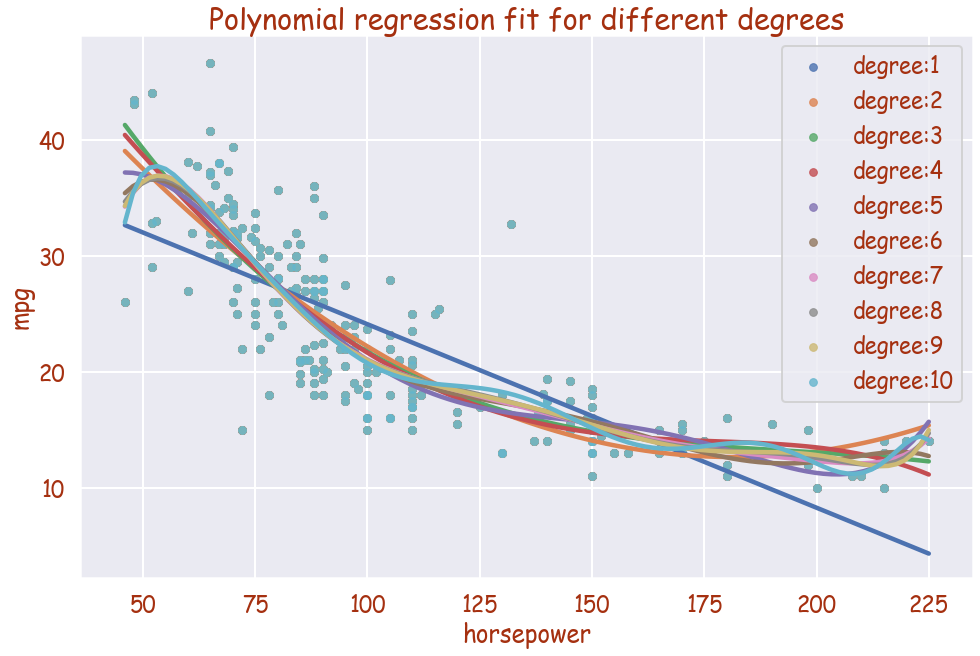

In [17]:
for degree in range(1,max_degree+1):
       ax = sns.regplot(x=X_train, y=y_train,scatter_kws={"s": 60},order=degree, ci=None,seed=200,label='degree:'+str(degree))
ax.legend()
ax.set_title("Polynomial regression fit for different degrees")
plt.savefig("Poly_reg_plot.png",dpi=300)

In [18]:
for degree in range(1,max_degree+1):
        polynomial_features= PolynomialFeatures(degree=degree) ##-- degree means the highest exponent that can be possible in the polynomial
        x_poly_train = polynomial_features.fit_transform(X_train)
        x_poly_test = polynomial_features.fit_transform(X_test)
        model = LinearRegression()
        model.fit(x_poly_train, y_train)
        y_poly_pred = model.predict(x_poly_test)
        y_poly_pred_train = model.predict(x_poly_train)
        mse_test = mean_squared_error(y_test,y_poly_pred)
        mse_train = mean_squared_error(y_train,y_poly_pred_train)
        r2_test = r2_score(y_test,y_poly_pred)
        r2_train = r2_score(y_train,y_poly_pred_train)
        ################ create a plot scatter plot, y axis= mse, xaxis=degree
        mse_test_list.append(mse_test)
        mse_train_list.append(mse_train)
        #plt.scatter(X,y)
        #plt.plot(X_train,model.predict(x_poly_train))
     

In [19]:
mse_test_list


[24.87459625671344,
 22.597336993680127,
 23.725404923837303,
 23.67993020287988,
 23.44114342001982,
 23.207182738813852,
 23.504917765852472,
 23.707880720577457,
 23.639330263734106,
 23.61995288610646]

In [20]:
mse_train_list

[23.327240252839736,
 16.882089716074677,
 16.45067167613862,
 16.405852563167816,
 15.814191782270122,
 15.595437621610944,
 15.741977882439429,
 15.898850811347593,
 15.92064574395545,
 15.788012834743839]

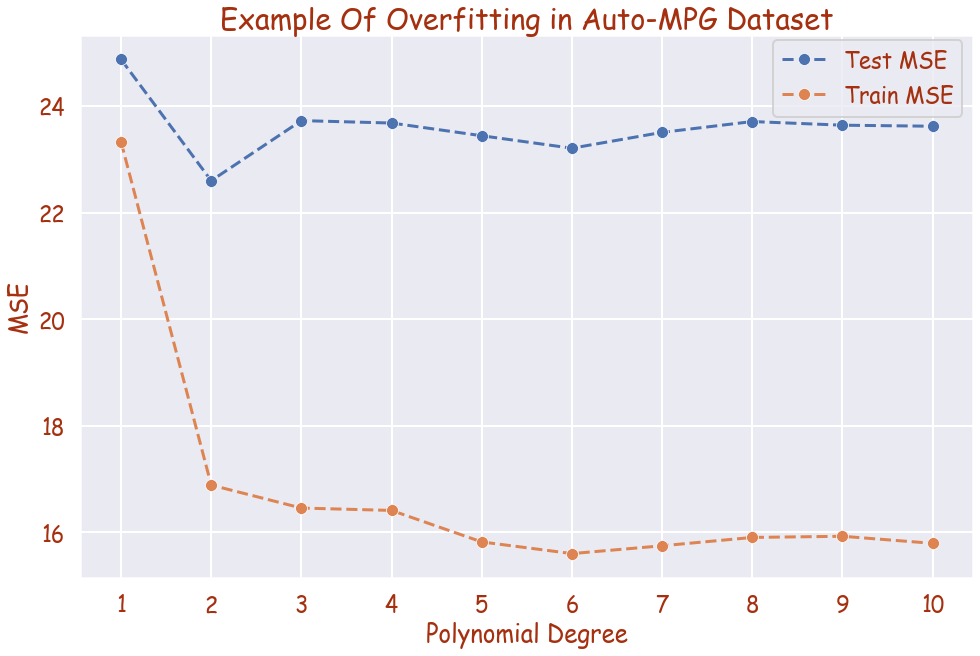

In [21]:
x=list(range(1,11,1))
ax=sns.lineplot(y=mse_test_list,x=x,marker="o")
ax=sns.lineplot(y=mse_train_list,x=x,marker="o")
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.lines[0].set_linestyle("--")
ax.lines[1].set_linestyle("--")
ax.set_xlabel('Polynomial Degree');ax.set_ylabel('MSE'); 
ax.figure.legend(['Test MSE','Train MSE'], 
                 bbox_to_anchor=(1,1.01),loc=1, bbox_transform=ax.transAxes)
ax.set_title("Example Of Overfitting in Auto-MPG Dataset")
plt.savefig("overfitting.png",dpi=300)